In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Attributes information:

1.	Encounter ID	Unique identifier of an encounter

2.	Patient Number	Unique identifier of a patient

3.	Race	Values: Caucasian, Asian, African American, Hispanic, and other

4.	Gender	Values: male, female, and unknown/invalid

5.	Age	Grouped in 10-year intervals: [0, 10), [10, 20), ..., [90, 100)

6.	Weight	Weight in pounds

7.	Admission Type	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, new-born, and not available

8.	Discharge disposition	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

9.	Admission source	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

10.	Time in hospital	Integer number of days between admission and discharge

11.	Payer Code	Integer identifier corresponding to 23 distinct values, for example, Blue Cross\Blue Shield, Medicare, and self-pay

12.	Medical Speciality	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct
values, for example, cardiology, internal medicine, family\general practice, and
surgeon

13.	Number of Outpatient visits	Number of outpatient visits in the year preceding the encounter

14.	Number of lab procedures	Number of lab tests performed during encounter

15.	Number of procedures	Number of procedures (other than lab tests) performed during the encounter

16.	Number of Medications	Number of distinct generic names administered during the encounter

17.	Number of emergency visits	Number of emergency visits of the patient in the year preceding the encounter

18	Number of inpatient visits	Number of inpatient visits of the patient in the year preceding the encounter

19.	Diagnosis 1	The primary diagnosis (coded as first three digits of ICD9) 848 distinct values

20.	Diagnosis 2	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

21.	Diagnosis 3	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct

22.	Number of Diagnoses	Number of diagnoses entered in the system

23.	Glucose serum test result	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,”
“normal,” and “none” if not measured

24.	A1c test result	Indicates the range of the result or if the test was not taken. Values: “>8” if the result
was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal”
if the result was less than 7%, and “none” if not measured

25.	Change of medications	Indicates if there was a change in diabetic medications (either dosage or generic
name). Values: “change” and “no change”

26.	Diabetics medication	Indicates if the there was any diabetic medication prescribed. Values: “yes” and “no”

27.	24 features for medication
	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide,
glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone,
rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin,
glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone,
metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether
the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage
was increased during the encounter, “down” if the dosage was decreased, “steady” if the
dosage did not change, and “no” if the drug was not prescribed

28.	Readmitted	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than
  30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no
  record of readmission

In [3]:
df.shape

(101766, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


There are 50 features in this data. It conatins numerical values(int) and categorical values(object).

There are 101766 samples present in this dataset. There seem to be no null values.We will dig deep and find out more.

# Data Preprocessing.

There are 50 features looking into all of these.

1. encounter_id : unique identifier of an encounter

In [6]:
df['encounter_id'].nunique()

101766

All the patients that have come to the hospital have been provided with an encounter_id so that is why there are 101766 different unique values.

2. patient_nbr : unique identifier of a patient

In [7]:
df['patient_nbr'].nunique()

71518

There are 71518 unique paitents that have entered the system.

#encounter_id and patient_nbr: these are just identifiers and not useful variables so they can be dropped

In [8]:
df = df.drop(columns=['encounter_id', 'patient_nbr'])

In [9]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
for i in df.columns:
    print(i,df[i].unique())
    print(i,df[i].nunique())
    print('\n')
       

race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
race 6


gender ['Female' 'Male' 'Unknown/Invalid']
gender 3


age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
age 10


weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
weight 10


admission_type_id [6 1 2 3 4 5 8 7]
admission_type_id 8


discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
discharge_disposition_id 26


admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
admission_source_id 17


time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
time_in_hospital 14


payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
payer_code 18


medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics

diag_3 ['?' '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427'
 '627' '414' '416' '714' '428' '582' 'V43' '250.01' '263' '250.42' '276'
 '482' '401' '250.41' '585' '781' '278' '998' '568' '682' '618' '250.02'
 '305' '707' '496' '599' '715' '424' '518' '553' '794' '411' 'V42' '531'
 '511' '490' '562' '250.8' '250.7' '250.52' '784' '491' '581' '420' '8'
 '724' '730' '789' '131' '250.82' '999' '41' '493' '250.03' '753' '786'
 '529' 'E888' '425' '595' '303' '560' '711' '492' '332' '296' '438' '362'
 '250.4' '654' '244' 'V70' '737' '625' '681' '250.51' '404' 'V10' '810'
 '280' '440' '785' '588' '569' '272' '997' '250.43' '918' '584' '54' '788'
 '426' '722' '250.92' '196' '461' '535' '787' '891' '284' '458' '648'
 '780' '182' '285' '593' '413' '664' '564' '201' '356' 'V15' '292' '782'
 '473' '455' 'E932' '357' '348' '294' '250.23' '459' 'E878' '437' '733'
 '507' '525' '250.53' '397' '572' '805' '453' '331' '736' '402' '591'
 '576' '465' '533' '703' '349' '315' '658' '608' '57

treating the special character '?' present in the given columns

In [11]:
df['race'] = df['race'].replace({'?':np.nan})
df['gender'] = df['gender'].replace({'Unknown/Invalid':np.nan})
df['weight'] = df['weight'].replace({'?':np.nan})
df['payer_code'] = df['payer_code'].replace({'?':np.nan})
df['medical_specialty'] = df['medical_specialty'].replace({'?':np.nan})
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].replace({'?':np.nan})

In [12]:
for i in df.columns:
    print(i,df[i].unique())
    print(i,df[i].nunique())
    print('\n')

race ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
race 5


gender ['Female' 'Male' nan]
gender 2


age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
age 10


weight [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
weight 9


admission_type_id [6 1 2 3 4 5 8 7]
admission_type_id 8


discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
discharge_disposition_id 26


admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
admission_source_id 17


time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
time_in_hospital 14


payer_code [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
payer_code 17


medical_specialty ['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenter

A1Cresult ['None' '>7' '>8' 'Norm']
A1Cresult 4


metformin ['No' 'Steady' 'Up' 'Down']
metformin 4


repaglinide ['No' 'Up' 'Steady' 'Down']
repaglinide 4


nateglinide ['No' 'Steady' 'Down' 'Up']
nateglinide 4


chlorpropamide ['No' 'Steady' 'Down' 'Up']
chlorpropamide 4


glimepiride ['No' 'Steady' 'Down' 'Up']
glimepiride 4


acetohexamide ['No' 'Steady']
acetohexamide 2


glipizide ['No' 'Steady' 'Up' 'Down']
glipizide 4


glyburide ['No' 'Steady' 'Up' 'Down']
glyburide 4


tolbutamide ['No' 'Steady']
tolbutamide 2


pioglitazone ['No' 'Steady' 'Up' 'Down']
pioglitazone 4


rosiglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone 4


acarbose ['No' 'Steady' 'Up' 'Down']
acarbose 4


miglitol ['No' 'Steady' 'Down' 'Up']
miglitol 4


troglitazone ['No' 'Steady']
troglitazone 2


tolazamide ['No' 'Steady' 'Up']
tolazamide 3


examide ['No']
examide 1


citoglipton ['No']
citoglipton 1


insulin ['No' 'Up' 'Steady' 'Down']
insulin 4


glyburide-metformin ['No' 'Steady' 'Down' 'Up']
gly

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total,percentage], axis=1, keys=['Total', 'Percentage'])
missing_data

,Total,Percentage
weight,98569,96.858479
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636
gender,3,0.002948
tolazamide,0,0.000000
tolbutamide,0,0.000000


In [14]:
# from the above we can infer that the weight column has 96% of missing values so we can drop the weight column. 
# and the columns such as payercode and medical_specialty has 39.5% and 49% of missing values respectively so 
# we can drop those columns too.

In [15]:
df.drop(['medical_specialty','weight','payer_code'],axis=1,inplace=True)
df.head() 

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
df.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [17]:
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].replace({np.nan:'-999'})
df[['diag_1','diag_2','diag_3']].isnull().sum()


diag_1    0
diag_2    0
diag_3    0
dtype: int64

In [18]:
# since it has all numbers we randomly replaced nan with '-999'.

In [19]:
df['race'] = df['race'].fillna(df['race'].mode()[0])
df['race'].isnull().sum()

0

In [20]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['gender'].isnull().sum()

0

In [21]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [22]:
# all the missing values are treated.

In [23]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


There are 8 unique values ranging from 1 to 8. These 8 values correspond to : 

1	Emergency

2	Urgent

3	Elective

4	Newborn

5	Not Available

6	NULL

7	Trauma Center

8	Not Mapped

For further analysis we can merger these categories into less number of categories.

Emeregncy/Urgent/Trauma Center ---> Emergency 

Not Available/Null/Not Mapped ---> Not Available

Elective ---> Elective

New Born ---> New Born

In [24]:
df['admission_type_id']=df['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',
                                 5:'Not Available', 6:'Not Available', 8:'Not Available',
                                 3:'Elective',4:'Newborn'})


1	 Physician Referral

2	Clinic Referral

3	HMO Referral(Health Maintenance Organization)

4	Transfer from a hospital

5	 Transfer from a Skilled Nursing Facility (SNF)

6	 Transfer from another health care facility

7	 Emergency Room

8	 Court/Law Enforcement

9	 Not Available

10	 Transfer from critial access hospital

11	Normal Delivery

12	 Premature Delivery

13	 Sick Baby

14	 Extramural Birth

15	Not Available

17	NULL

18	 Transfer From Another Home Health Agency

19	Readmission to Same Home Health Agency

20	 Not Mapped

21	Unknown/Invalid

22	 Transfer from hospital inpt/same fac reslt in a sep claim

23	 Born inside this hospital

24	 Born outside this hospital

25	 Transfer from Ambulatory Surgery Center

26	Transfer from Hospice

#### We can merge several grps over here to reduce the number of categories:

1/2/3 ---> Referral

4/5/6/10/18/19/25/26/22 ---> Transferred from another health care facility

7 ---> Emergency

9/15/17/20/21 ---> Not Available

8 --->  Court/Law Enforcement

Delivery ---> 11/12/14/13/23/24

In [25]:
df['admission_source_id']=df['admission_source_id'].replace({1:'Referral',
                                   2:'Referral',
                                   3:'Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   8:'Emergency',                                    
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   7:'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Delivery',
                                   12:'Delivery',
                                   13:'Delivery',
                                   14:'Delivery',
                                   23:'Delivery',
                                   22:"Transferred from another health care facility",                                    
                                   24:'Delivery'})


#### discharge_disposition_id	description

1	Discharged to home

2	Discharged/transferred to another short term hospital

3	Discharged/transferred to SNF(skilled nursing facility)

4	Discharged/transferred to ICF(intermediate care facility)

5	Discharged/transferred to another type of inpatient care institution

6	Discharged/transferred to home with home health service

7	Left AMA(Against Medical Advice.)

8	Discharged/transferred to home under care of Home IV provider

9	Admitted as an inpatient to this hospital

10	Neonate discharged to another hospital for neonatal aftercare

11	Expired

12	Still patient or expected to return for outpatient services

13	Hospice / home

14	Hospice / medical facility

15	Discharged/transferred within this institution to Medicare approved swing bed

16	Discharged/transferred/referred another institution for outpatient services

17	Discharged/transferred/referred to this institution for outpatient services

18	NULL

19	Expired at home. Medicaid only, hospice.

20	Expired in a medical facility. Medicaid only, hospice.

21	Expired, place unknown. Medicaid only, hospice.

22	Discharged/transferred to another rehab fac including rehab units of a hospital .

23	Discharged/transferred to a long term care hospital.

24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25	Not Mapped

26	Unknown/Invalid

30	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27	Discharged/transferred to a federal health care facility.

28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29	Discharged/transferred to a Critical Access Hospital (CAH).

#### We can merge several grps over here to reduce the number of categories:

1 ---> Discharged to home

2/3/4/5/10/16/22/23/24/30/27/28/29 ---> Transferred to another medical facility

7 ---> Left AMA(Against Medical Advice.)

6/8 ---> Discharged to home with home health service

9/12/15/17 ---> Still patient/referred to this institution

11/19/20/21  ---> Expired

18/25/26 ---> Not Available

13/14 ---> Hospice

In [26]:
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({1:'Discharged to home',
                                        2:'Transferred to another medical facility',
                                        3:'Transferred to another medical facility',
                                        4:'Transferred to another medical facility',
                                        5:'Transferred to another medical facility',
                                        16:'Transferred to another medical facility',
                                        22:'Transferred to another medical facility',
                                        23:'Transferred to another medical facility',
                                        24:'Transferred to another medical facility',
                                        27:'Transferred to another medical facility',
                                        28:'Transferred to another medical facility',
                                        29:'Transferred to another medical facility',
                                        30:'Transferred to another medical facility',                            
                                        6:'Discharged to home with home health service',
                                        8:'Discharged to home with home health service',
                                        7:'Left AMA',
                                        9:'Still patient/referred to this institution',
                                        12:'Still patient/referred to this institution',
                                        15:'Still patient/referred to this institution',
                                        17:'Still patient/referred to this institution',
                                        10:'Neonate discharged',
                                        11:'Expired',
                                        19:'Expired',
                                        20:'Expired',
                                        21:'Expired',
                                        13:'Hospice',
                                        14:'Hospice',
                                        18:'Not Available',
                                        25:'Not Available',
                                        26:'Not Available'})

In [27]:
df=df[df['discharge_disposition_id']!='Expired']
df=df[df['discharge_disposition_id']!='Neonate discharged']
df=df[df['discharge_disposition_id']!='Hospice']

The patients who have expired should be removed from the system beacuse they will create bias as they will not be readmitted.

19. Diagnosis1: The primary diagnosis(coded as first three digits of ICD9) 

20. Diagnosis2: Secondary diagnosis(coded as first three digits of ICD9)

21. Diagnosis3: Additional secondary diagnosis(coded as first three digits of ICD9)

In [28]:
df.diag_3.unique()

array(['-999', '255', 'V27', '403', '250', 'V45', '38', '486', '996',
       '197', '250.6', '427', '627', '414', '416', '714', '428', '582',
       'V43', '250.01', '263', '250.42', '276', '482', '401', '250.41',
       '585', '781', '278', '998', '568', '682', '618', '250.02', '305',
       '707', '496', '715', '424', '518', '553', '794', '411', 'V42',
       '531', '511', '490', '562', '250.8', '599', '250.7', '250.52',
       '491', '581', '420', '8', '724', '730', '789', '131', '250.82',
       '999', '41', '493', '250.03', '753', '786', '529', 'E888', '425',
       '595', '303', '560', '711', '492', '332', '296', '438', '362',
       '250.4', '654', '244', 'V70', '737', '625', '681', '250.51', '404',
       'V10', '810', '280', '440', '785', '588', '569', '272', '997',
       '250.43', '918', '584', '54', '788', '426', '722', '250.92', '461',
       '535', '787', '891', '284', '458', '648', '780', '182', '285',
       '593', '413', '664', '564', '201', '356', 'V15', '292', '196',

In [29]:
def getCategor(x):
    if 'V' in str(x) or 'E' in str(x):
        return 'Others'
    
    x = float(x)
    
    if (x >= 390 and x <= 459) or np.floor(x) == 785:
        return 'Circulatory'
    elif (x >= 460 and x <= 519) or np.floor(x) == 786:
        return 'Respiratory'
    elif (x >= 520 and x <= 579) or np.floor(x) == 787:
        return 'Digestive'
    elif np.floor(x) == 250:
        return 'Diabetes'
    elif x >= 800 and x <= 999:
        return 'Injury'
    elif x >= 710 and x <= 739:
        return 'Musculoskeletal'
    elif (x >= 580 and x <= 629) or np.floor(x) == 788:
        return 'Genitourinary'
    elif x >= 140 and x <= 239 or np.floor(x) in [780, 781, 784] or x >= 790 and x <=799 or x>=240 and x<=249 or x>=251 and x<=279 or x>=680 and x<=709 or np.floor(x)==782 or x>=1 and x<=139:
        return 'Neoplasms'
    else:
        return 'Others'
        

In [30]:
#changing the values into categories
df['Diagnosis1'] = df['diag_1'].apply(lambda x: getCategor(x))
df['Diagnosis2'] = df['diag_2'].apply(lambda x: getCategor(x))
df['Diagnosis3'] = df['diag_3'].apply(lambda x: getCategor(x))

In [31]:
df['Diagnosis1'].unique()

array(['Diabetes', 'Neoplasms', 'Others', 'Circulatory', 'Respiratory',
       'Injury', 'Musculoskeletal', 'Digestive', 'Genitourinary'],
      dtype=object)

In [32]:
df.drop(['diag_1','diag_2','diag_3'],1,inplace=True)

In [33]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3'],
      dtype='object')

In [34]:
df.shape

(99337, 45)

In [35]:
cat_data = df.select_dtypes(exclude=np.number)
cat_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,metformin,repaglinide,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diagnosis1,Diagnosis2,Diagnosis3
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,None,None,No,No,...,No,No,No,No,No,No,NO,Diabetes,Others,Others
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,None,None,No,No,...,No,No,No,No,Ch,Yes,>30,Neoplasms,Diabetes,Neoplasms
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,None,None,No,No,...,No,No,No,No,No,Yes,NO,Others,Diabetes,Others
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,None,None,No,No,...,No,No,No,No,Ch,Yes,NO,Neoplasms,Diabetes,Circulatory
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,None,None,No,No,...,No,No,No,No,Ch,Yes,NO,Neoplasms,Neoplasms,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),Emergency,Transferred to another medical facility,Emergency,None,>8,Steady,No,...,No,No,No,No,Ch,Yes,>30,Diabetes,Others,Circulatory
101762,AfricanAmerican,Female,[80-90),Emergency,Transferred to another medical facility,Transferred from another health care facility,None,None,No,No,...,No,No,No,No,No,Yes,NO,Digestive,Neoplasms,Digestive
101763,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency,None,None,Steady,No,...,No,No,No,No,Ch,Yes,NO,Neoplasms,Genitourinary,Others
101764,Caucasian,Female,[80-90),Emergency,Transferred to another medical facility,Emergency,None,None,No,No,...,No,No,No,No,Ch,Yes,NO,Injury,Others,Injury


In [36]:
num_data = df.select_dtypes(include=np.number)
num_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,1,0,0,0,1
1,3,59,0,18,0,0,0,9
2,2,11,5,13,2,0,1,6
3,2,44,1,16,0,0,0,7
4,1,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9
101762,5,33,3,18,0,0,1,9
101763,1,53,0,9,1,0,0,13
101764,10,45,2,21,0,0,1,9


# Univariate Analysis

In [37]:
# univariate analysis for categorial column

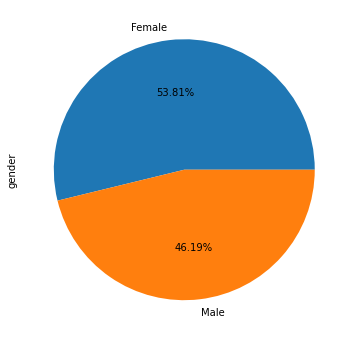

In [38]:
plt.rcParams["figure.figsize"] = (10,6)
df['gender'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

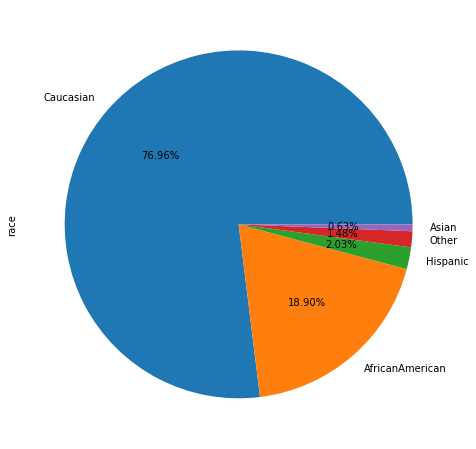

In [39]:
plt.rcParams["figure.figsize"] = (15,8)
df['race'].value_counts(normalize = True).plot(kind='pie',autopct='%.2f%%',)
plt.show()

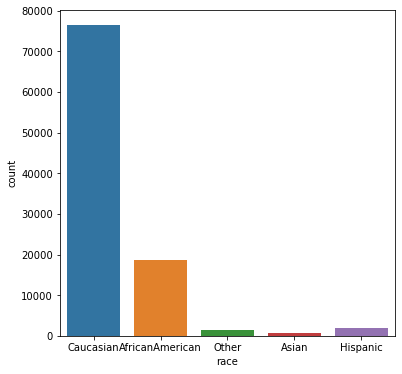

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(cat_data['race'])
plt.show()

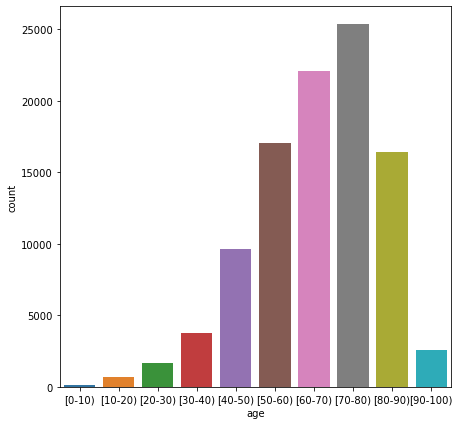

In [41]:
plt.figure(figsize=(7,7))
sns.countplot(cat_data['age'])
plt.show()

In [42]:
df[df['admission_type_id']== 'Newborn'][['gender','age','admission_type_id']]

,gender,age,admission_type_id
2043,Male,[50-60),Newborn
2203,Male,[80-90),Newborn
2461,Male,[70-80),Newborn
4823,Female,[60-70),Newborn
35877,Male,[60-70),Newborn
47548,Male,[40-50),Newborn
48711,Female,[70-80),Newborn
80354,Female,[0-10),Newborn
87714,Male,[60-70),Newborn
100721,Male,[80-90),Newborn


Droppping the category new born because the admission_type_id == newborn and the age and gender corresponding to it gives contradictory information.

In [43]:
df=df[df['admission_type_id']!='Newborn']

In [44]:
df.admission_type_id.value_counts()

Emergency        70521
Elective         18668
Not Available    10138
Name: admission_type_id, dtype: int64

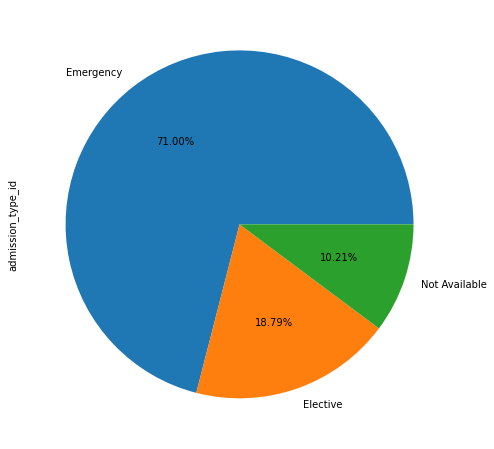

In [45]:
plt.rcParams["figure.figsize"] = (15,8)
df['admission_type_id'].value_counts(normalize = True).plot(kind='pie',autopct='%.2f%%',)
plt.show()

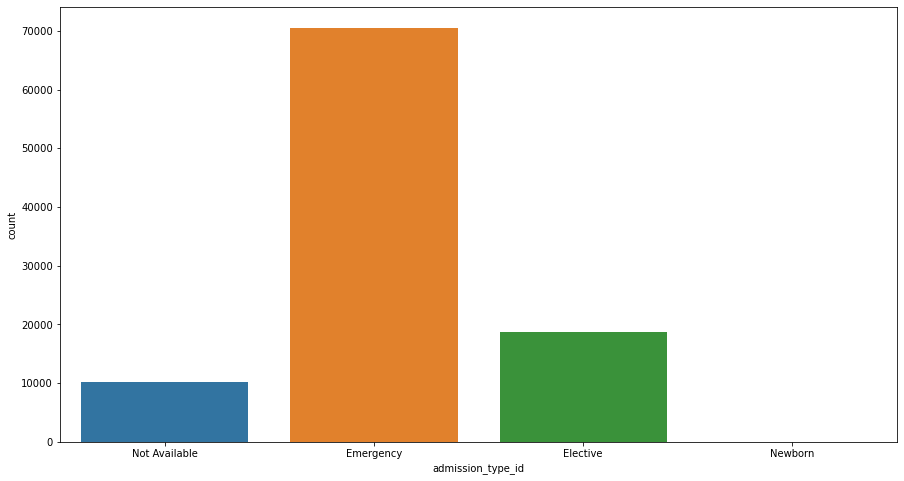

In [46]:
sns.countplot(cat_data['admission_type_id'])
plt.show()

In [47]:
cat_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3'],
      dtype='object')

In [48]:
df[df['admission_source_id']=='Delivery'][['gender','age','admission_source_id']]

,gender,age,admission_source_id
83432,Female,[70-80),Delivery
83510,Female,[20-30),Delivery
85588,Female,[70-80),Delivery
97384,Male,[70-80),Delivery


Droppping the category delivery  because the admission_source_id == delivery and the age corresponding to it give contradictory information.`

In [49]:
df=df[df['admission_source_id']!='Delivery']

* Since we have 2 columns regarding admission, type_id and source_id, we used this information to fill the ‘Not Available’ values in admssion_source_id columns with respect to the admission_type_id. For example, if admission_type_id is Emergency but admission_source_id is Not Available, we can fill Emergency(mode) in that place.
* After filling it admission_type_id column was dropped since it was giving the same information as admission_source_id and was less significant statistically.

In [50]:
df = df.reset_index(drop = True )

In [51]:
# Before
df[df['admission_type_id']=='Emergency']['admission_source_id'].value_counts()

Emergency                                        53077
Referral                                         11517
Transferred from another health care facility     4861
Not Available                                     1063
Name: admission_source_id, dtype: int64

In [52]:
for i in range(df.shape[0]):
    if df.loc[i, 'admission_source_id'] == 'Not Available' and df.loc[i, 'admission_type_id'] == 'Emergency':
        df.loc[i, 'admission_source_id'] = 'Emergency'

In [53]:
# After
df[df['admission_type_id']=='Emergency']['admission_source_id'].value_counts()

Emergency                                        54140
Referral                                         11517
Transferred from another health care facility     4861
Name: admission_source_id, dtype: int64

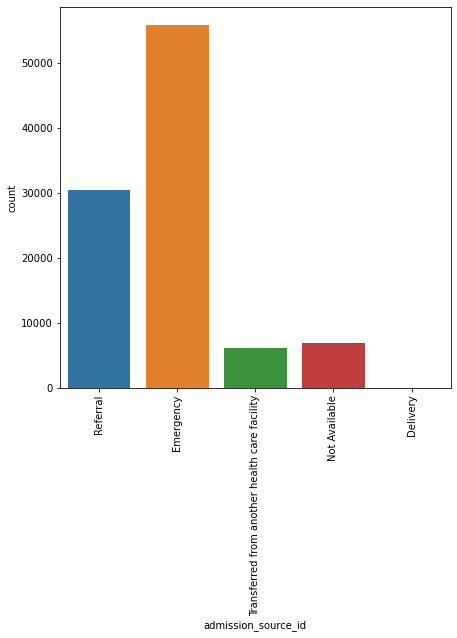

In [54]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['admission_source_id'])
plt.show()  ### pie charts and increase the size

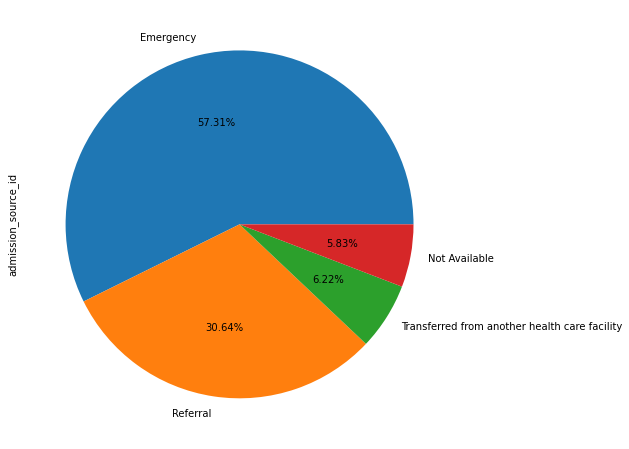

In [55]:
df['admission_source_id'].value_counts(normalize = True).plot(kind='pie',autopct='%.2f%%',)
plt.show()

In [56]:
# Before
df[df['admission_type_id']=='Elective']['admission_source_id'].value_counts()

Referral                                         16438
Transferred from another health care facility     1248
Emergency                                          922
Not Available                                       59
Name: admission_source_id, dtype: int64

In [57]:
for i in range(df.shape[0]):
    if df.loc[i, 'admission_source_id'] == 'Not Available' and df.loc[i, 'admission_type_id'] == 'Elective':
        df.loc[i, 'admission_source_id'] = 'Referral'

In [58]:
# After
df[df['admission_type_id']=='Elective']['admission_source_id'].value_counts()

Referral                                         16497
Transferred from another health care facility     1248
Emergency                                          922
Name: admission_source_id, dtype: int64

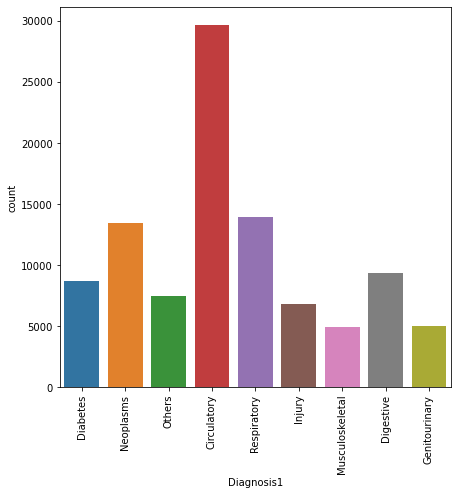

In [59]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['Diagnosis1'])
plt.show()

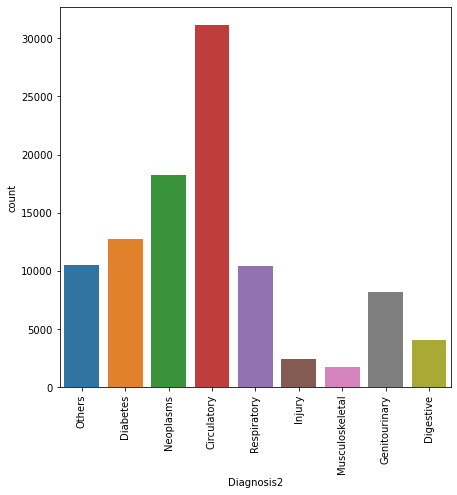

In [60]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['Diagnosis2'])
plt.show()

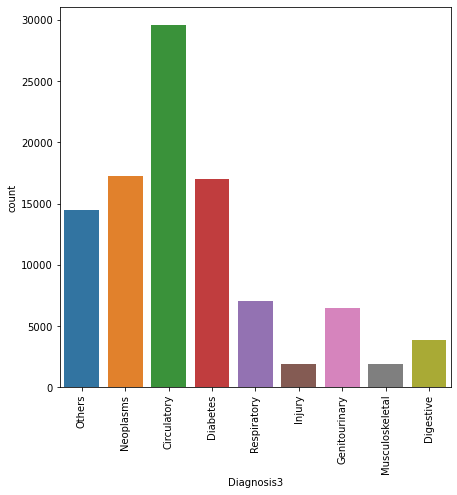

In [61]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['Diagnosis3'])
plt.show()

In [62]:
# univariate analysis for numerical column

In [63]:
num_data.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

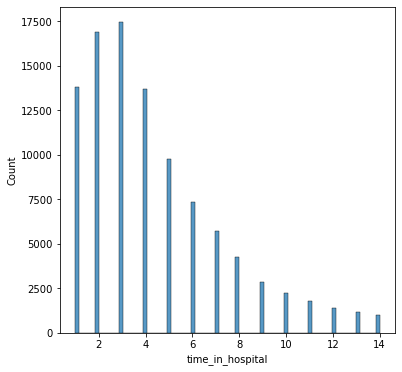

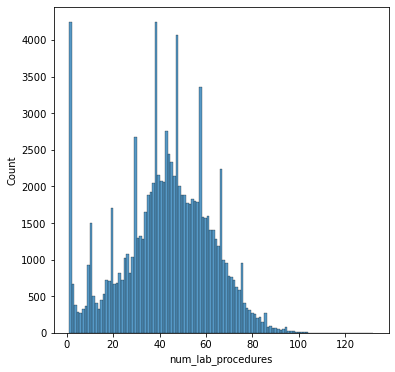

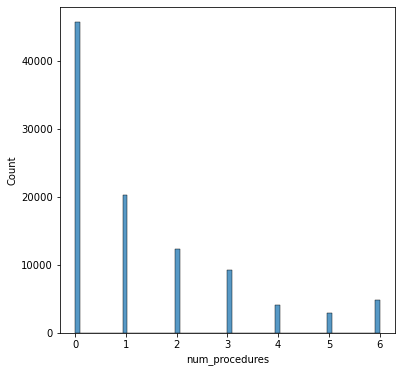

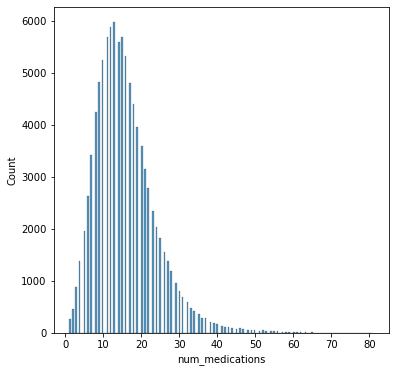

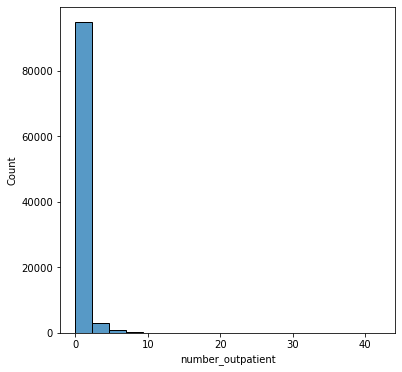

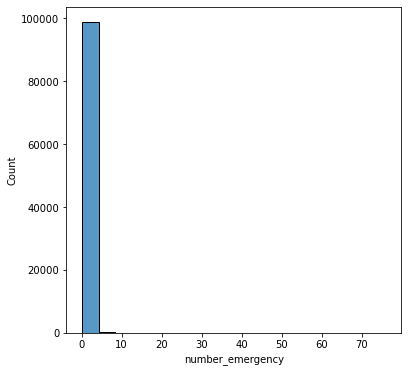

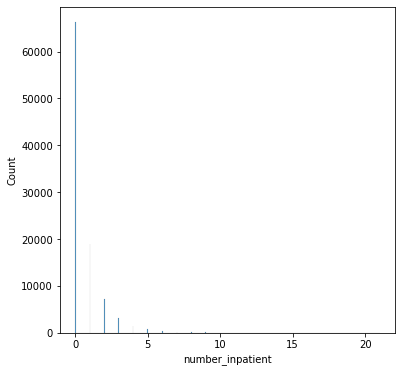

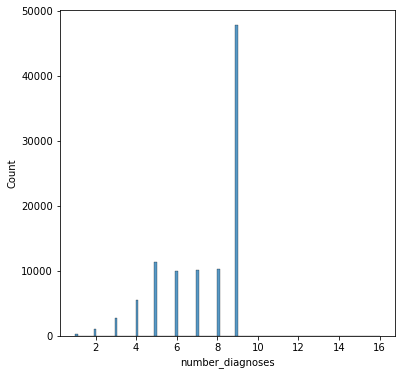

In [64]:
plt.rcParams["figure.figsize"] = (6,6)
for i in num_data.columns:
    sns.histplot(num_data[i])
    plt.show()

In [65]:
# univaraite analysis for the target column.

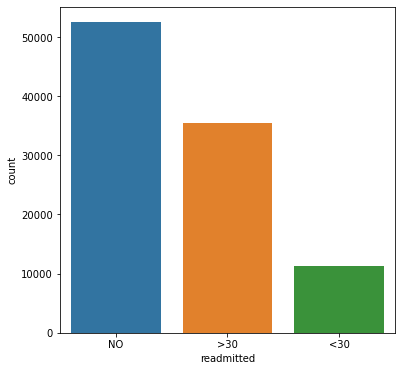

In [66]:
plt.rcParams["figure.figsize"] = (6,6)
sns.countplot(df['readmitted'])
plt.show()

In [67]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [68]:
df['readmitted']= df['readmitted'].replace( {'NO': 0, '<30': 1,'>30':1} ).astype(int)

In [69]:
df.reset_index(drop = True, inplace = True)

In [70]:
df['readmitted'].unique()

array([0, 1])

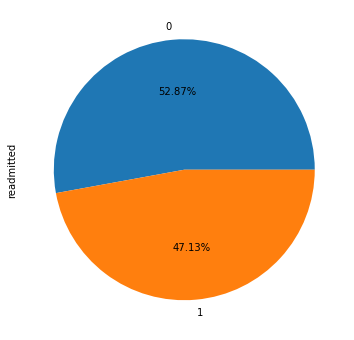

In [71]:
df['readmitted'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

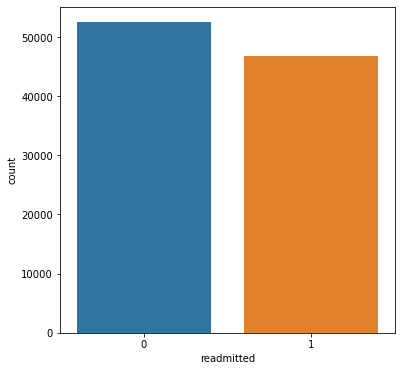

In [72]:
sns.countplot(df['readmitted'])
plt.show()

In [73]:
df.shape

(99323, 45)

# Bivariate Analysis

In [74]:
# since df['readmitted'] is the target column we check relationship with target and independent column.

In [75]:
# bivariate analysis of target variable with numerical columns

<AxesSubplot:xlabel='readmitted', ylabel='number_diagnoses'>

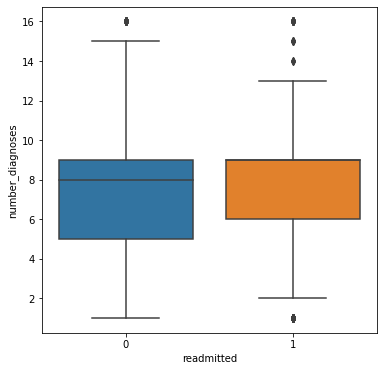

In [76]:
sns.boxplot(df['readmitted'],df['number_diagnoses'])

<AxesSubplot:xlabel='readmitted', ylabel='time_in_hospital'>

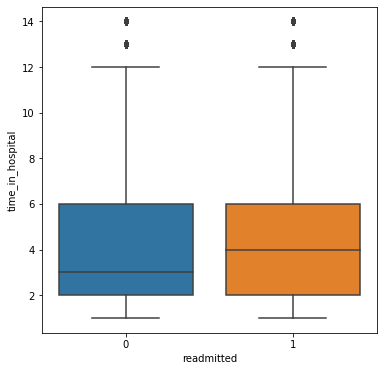

In [77]:
sns.boxplot(df['readmitted'],df['time_in_hospital'])

<AxesSubplot:xlabel='time_in_hospital', ylabel='readmitted'>

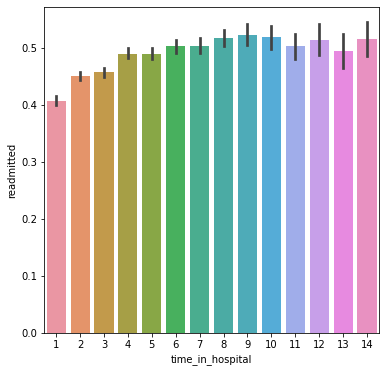

In [78]:
sns.barplot(df['time_in_hospital'],df['readmitted'])

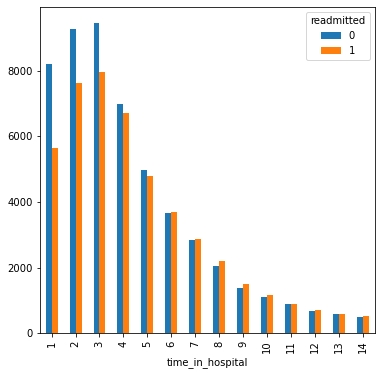

In [79]:
plt.rcParams["figure.figsize"] = (6,6)
tab = pd.crosstab(df['time_in_hospital'],df['readmitted'])
tab.plot(kind='bar')
plt.show()

In [80]:
# bivariate analysis with categorical columns

<AxesSubplot:xlabel='race'>

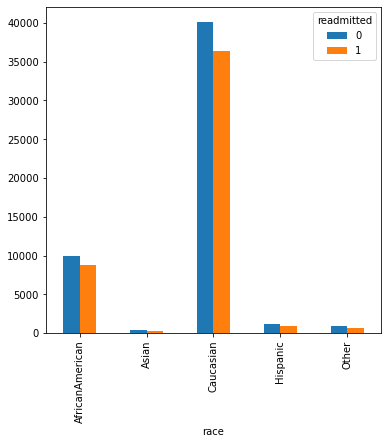

In [81]:
tab = pd.crosstab(df['race'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='age'>

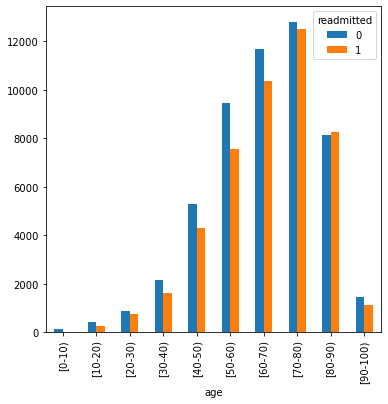

In [82]:
tab = pd.crosstab(df['age'],df['readmitted'])
tab.plot(kind='bar')

In [83]:
cat_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3'],
      dtype='object')

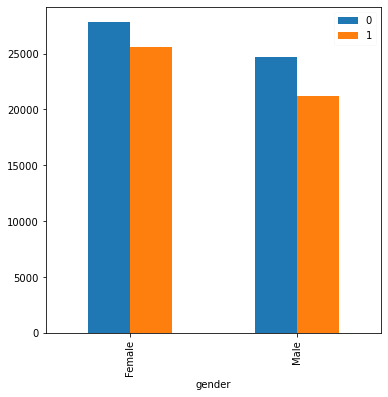

In [84]:
tab = pd.crosstab(df['gender'],df['readmitted'])
tab.plot(kind='bar')
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0,1))

<AxesSubplot:xlabel='admission_type_id'>

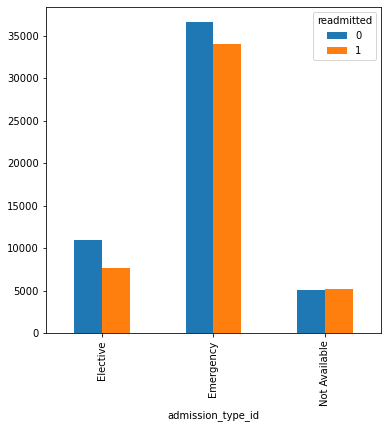

In [85]:
tab = pd.crosstab(df['admission_type_id'],df['readmitted'])
tab.plot(kind='bar') # horizontal and increase the size so the least dominiant shld be reflrcted

<AxesSubplot:xlabel='discharge_disposition_id'>

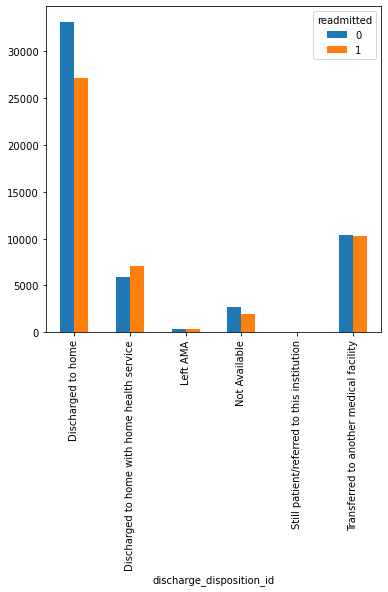

In [86]:
tab = pd.crosstab(df['discharge_disposition_id'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='admission_source_id'>

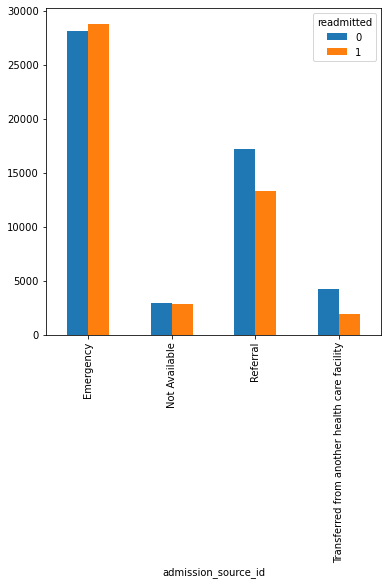

In [87]:
plt.rcParams["figure.figsize"] = (6,6)
tab = pd.crosstab(df['admission_source_id'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='Diagnosis2'>

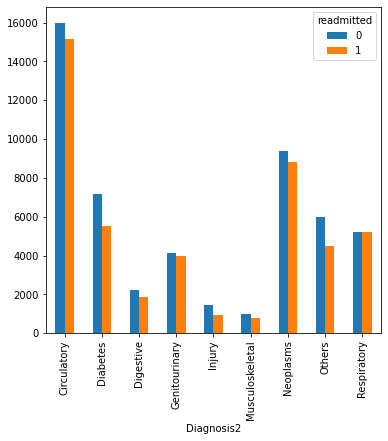

In [88]:
tab = pd.crosstab(df['Diagnosis2'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='Diagnosis1'>

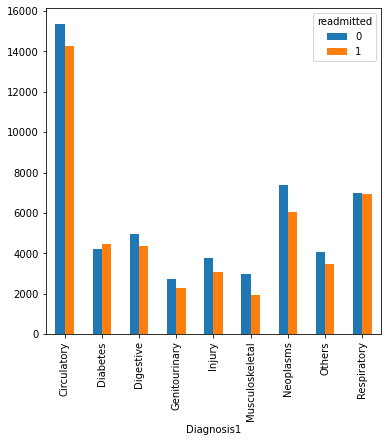

In [89]:
tab = pd.crosstab(df['Diagnosis1'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='Diagnosis3'>

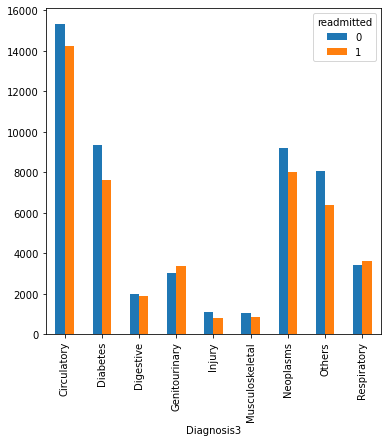

In [90]:
tab = pd.crosstab(df['Diagnosis3'],df['readmitted'])
tab.plot(kind='bar')

In [91]:
# bivariate analysis for different type medicines

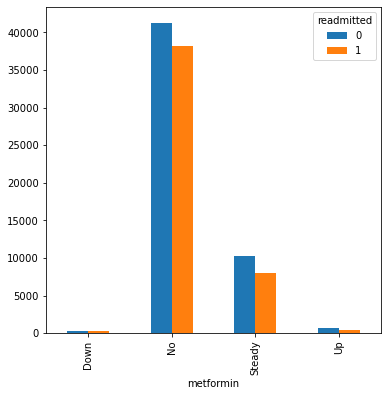

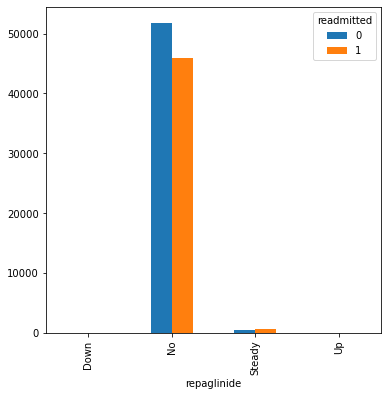

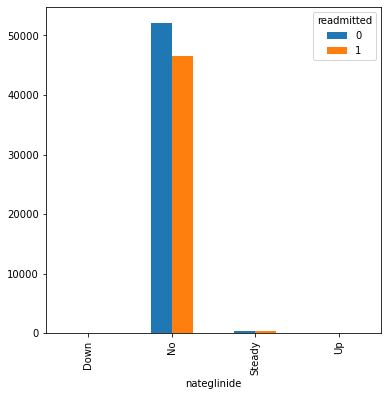

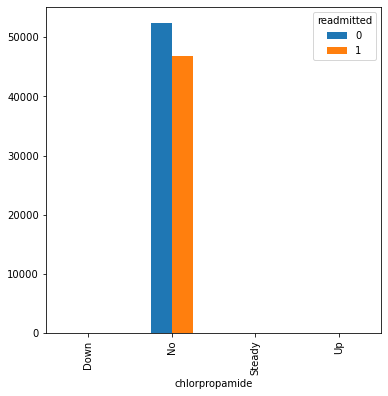

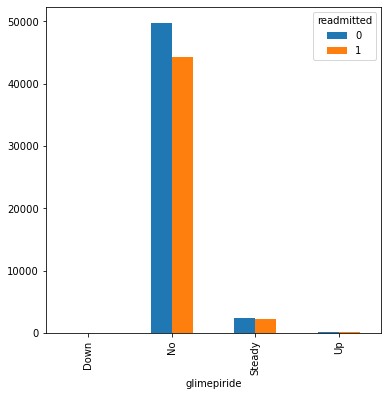

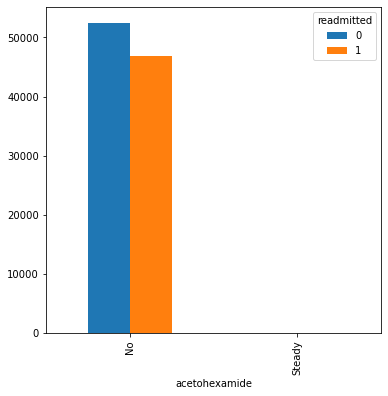

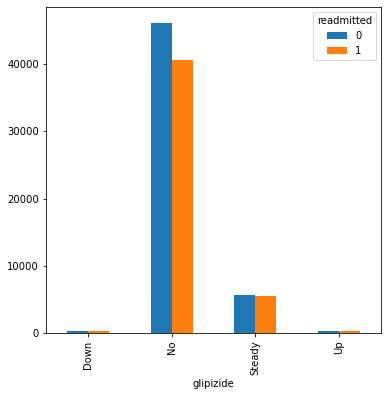

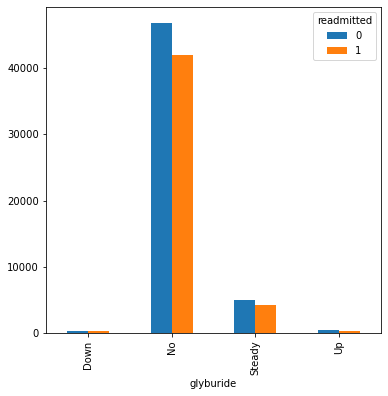

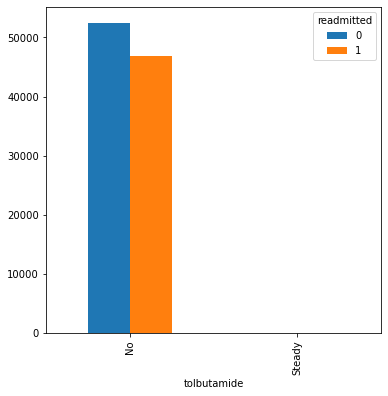

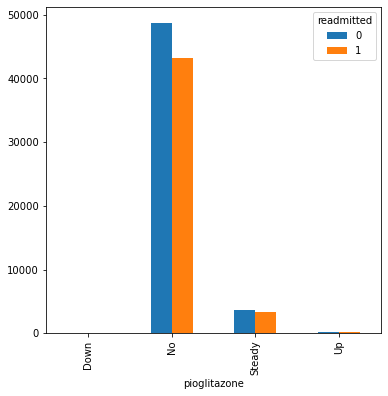

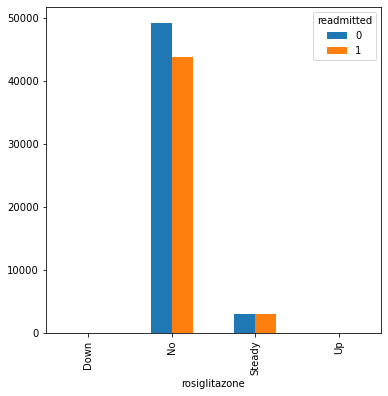

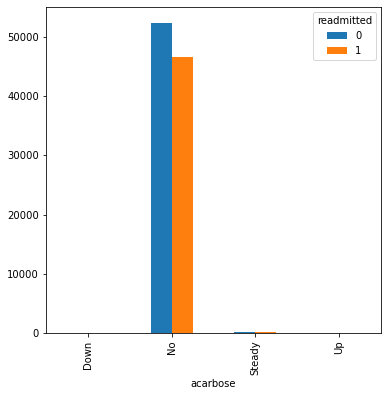

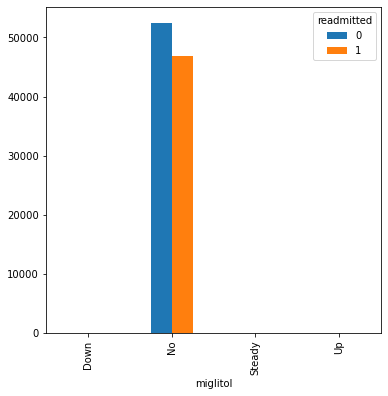

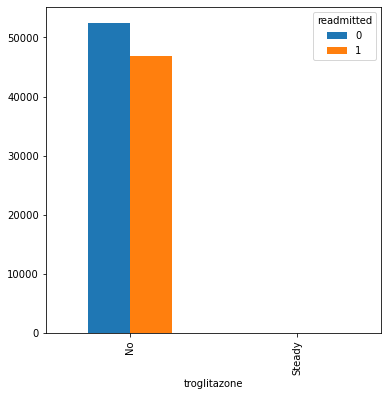

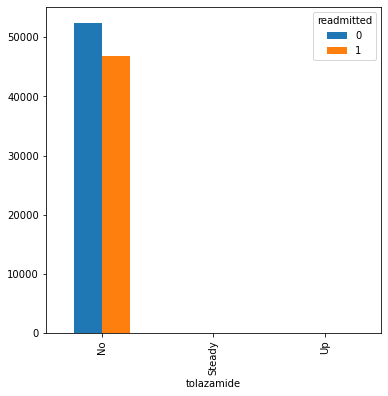

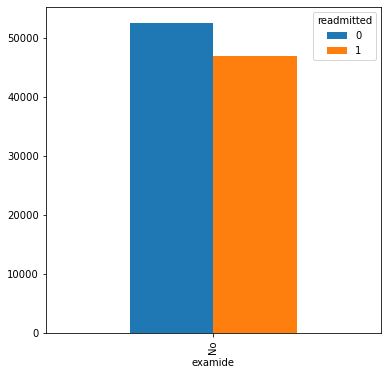

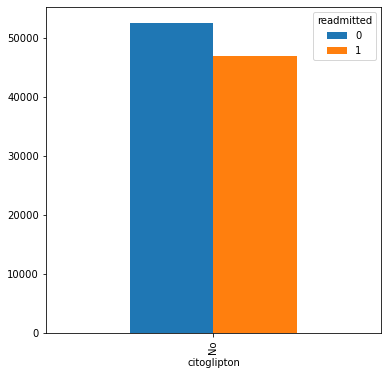

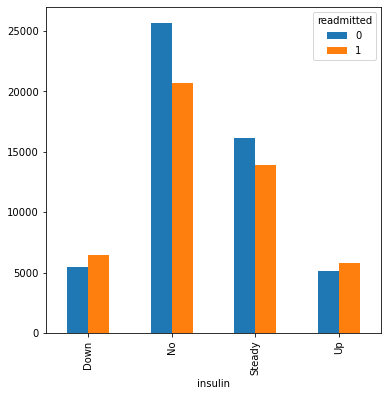

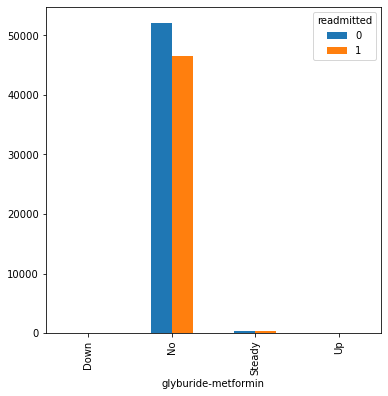

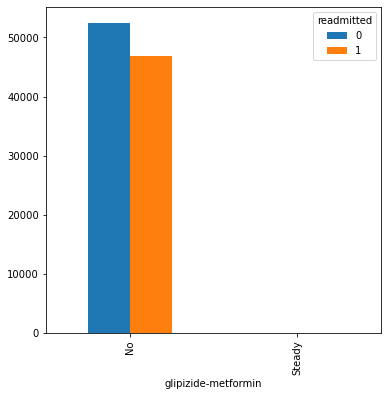

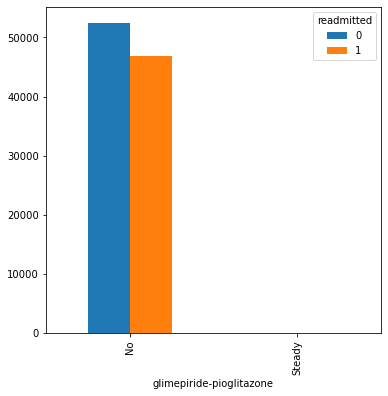

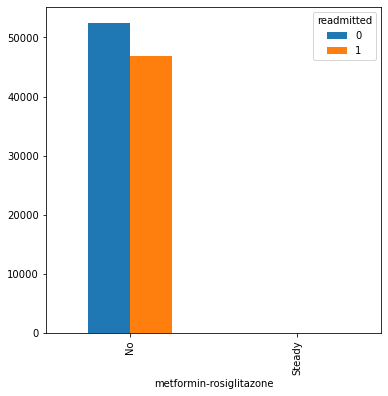

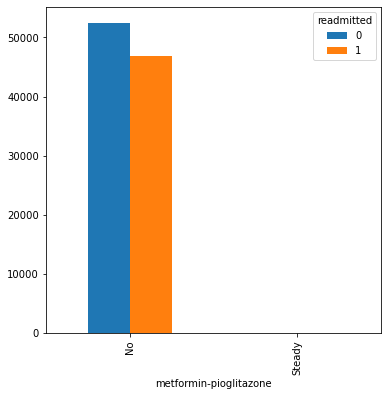

In [92]:
for i in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    pd.crosstab(df[i],df['readmitted']).plot(kind='bar')

In [93]:
df.shape

(99323, 45)

# Multivariate Analysis

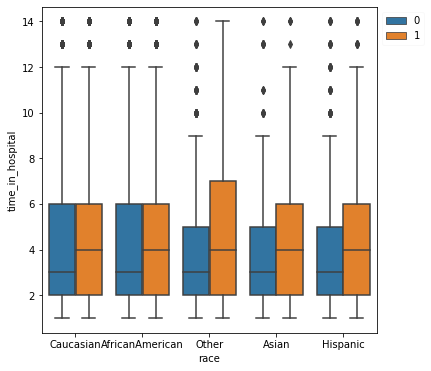

In [94]:
sns.boxplot(df['race'],df['time_in_hospital'],hue=df['readmitted'])
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0,1))
plt.show()

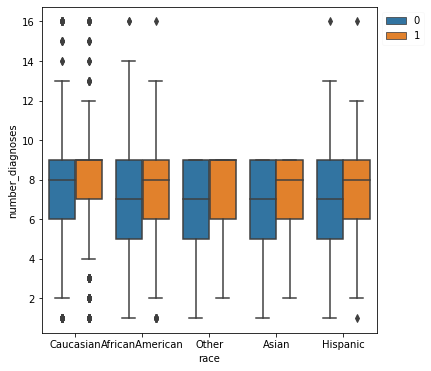

In [95]:
sns.boxplot(df['race'],df['number_diagnoses'],hue=df['readmitted'])
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0,1))
plt.show()

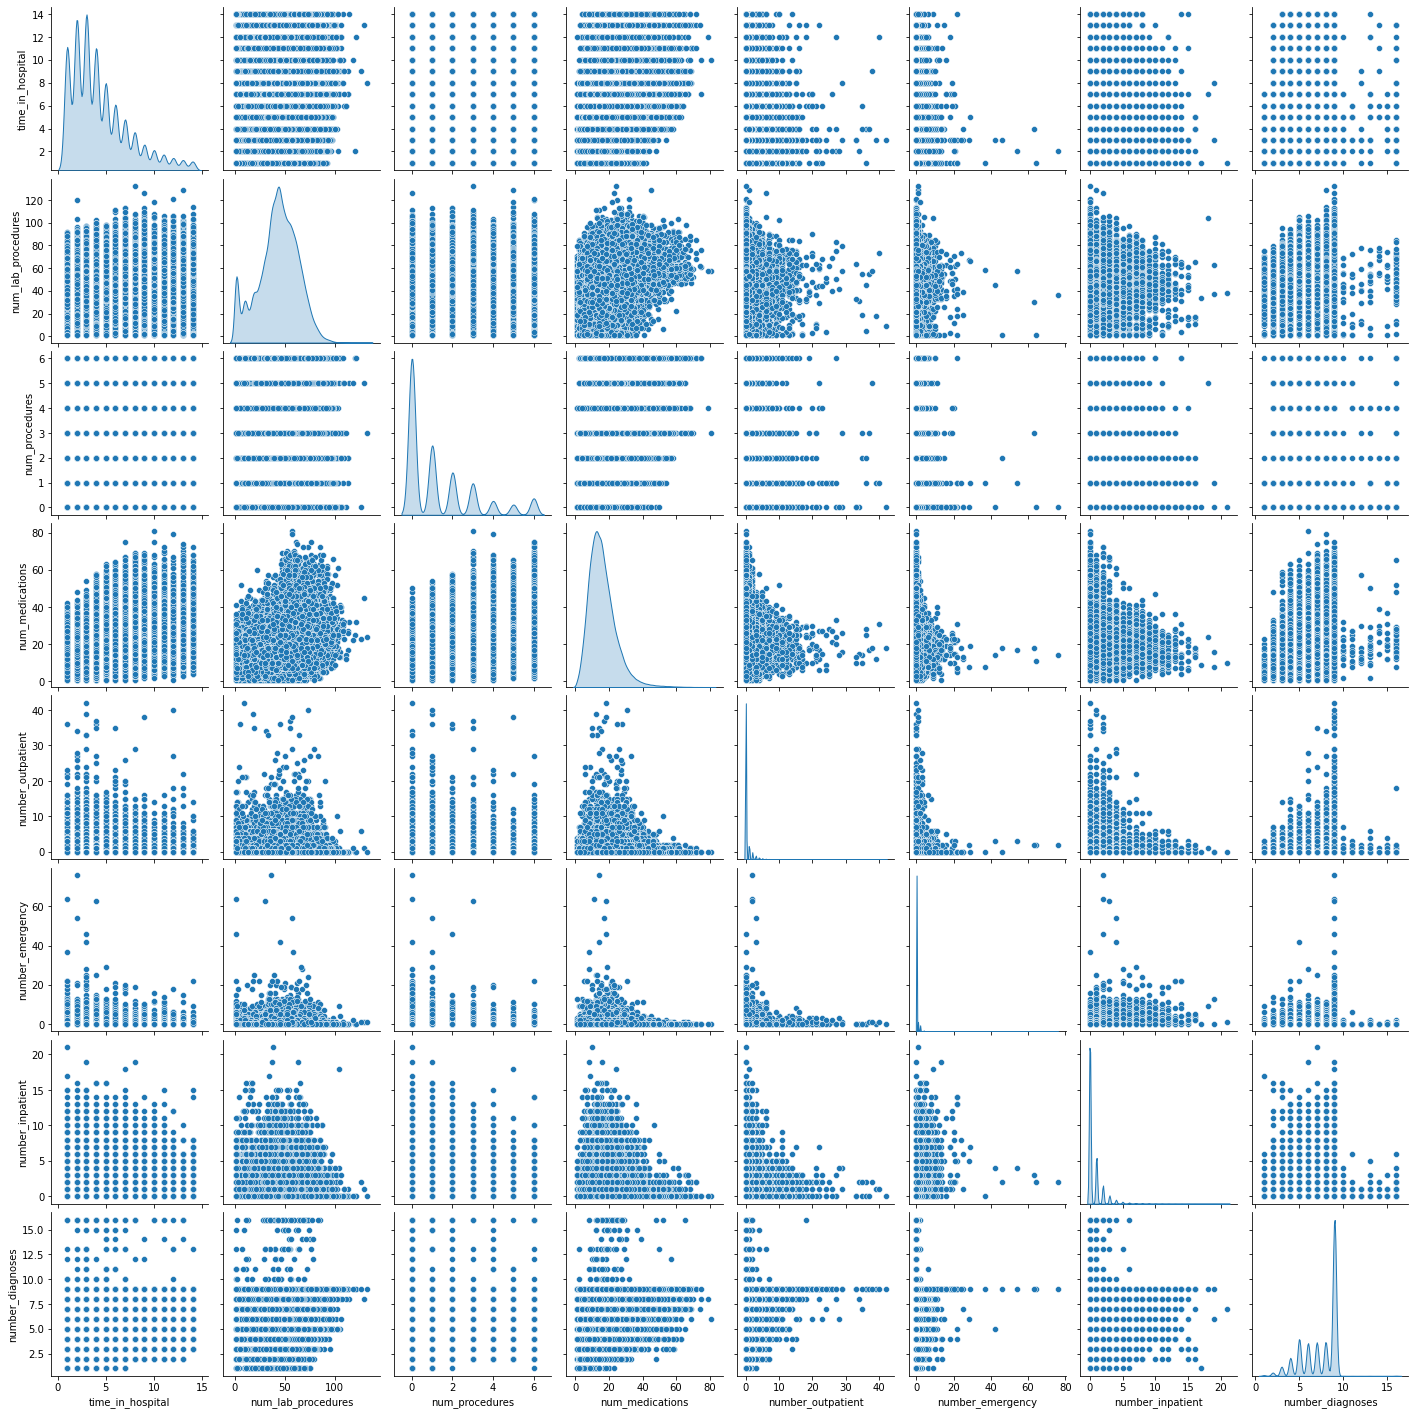

In [96]:
sns.pairplot(num_data,diag_kind='kde')
plt.show()

In [97]:
num_data.skew()

time_in_hospital       1.141919
num_lab_procedures    -0.241548
num_procedures         1.322147
num_medications        1.335329
number_outpatient      8.839419
number_emergency      22.848144
number_inpatient       3.633421
number_diagnoses      -0.861595
dtype: float64

In [98]:
num_data.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.319847,0.189933,0.463802,-0.009204,-0.009565,0.074241,0.220663
num_lab_procedures,0.319847,1.000000,0.051736,0.265170,-0.007600,-0.000973,0.039919,0.149723
num_procedures,0.189933,0.051736,1.000000,0.381928,-0.025265,-0.038716,-0.067028,0.070461
num_medications,0.463802,0.265170,0.381928,1.000000,0.046030,0.014023,0.065273,0.261627
number_outpatient,-0.009204,-0.007600,-0.025265,0.046030,1.000000,0.091665,0.108017,0.094809
number_emergency,-0.009565,-0.000973,-0.038716,0.014023,0.091665,1.000000,0.267706,0.055978
number_inpatient,0.074241,0.039919,-0.067028,0.065273,0.108017,0.267706,1.000000,0.104738
number_diagnoses,0.220663,0.149723,0.070461,0.261627,0.094809,0.055978,0.104738,1.000000


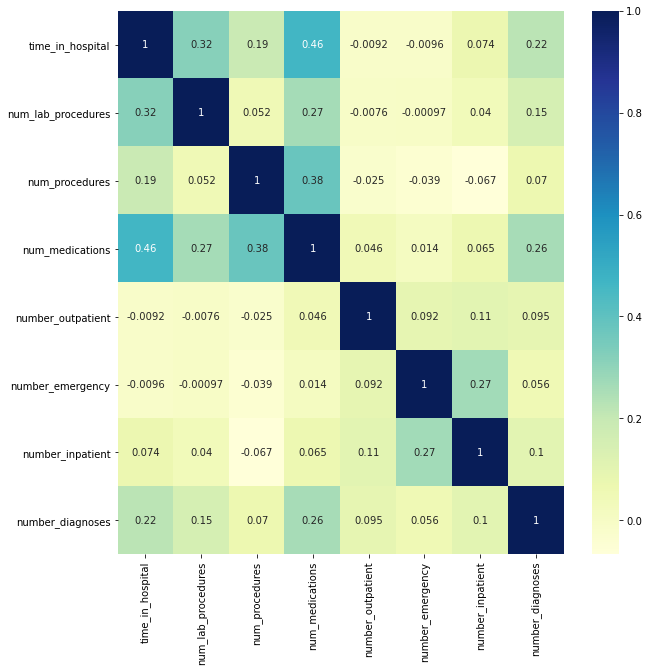

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(num_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

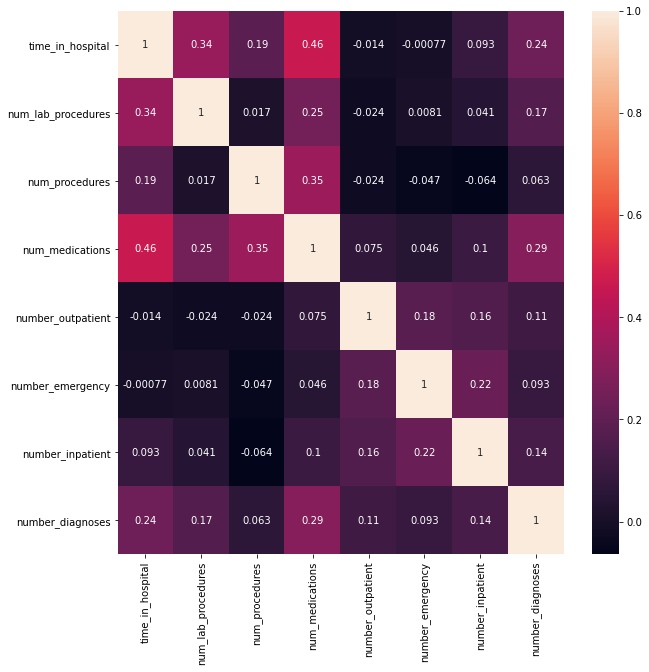

In [100]:
# pearson correclation
plt.figure(figsize=(10,10))
sns.heatmap(num_data.corr(method= 'spearman'),annot=True)
plt.show()

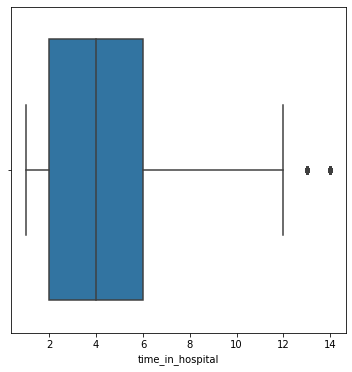

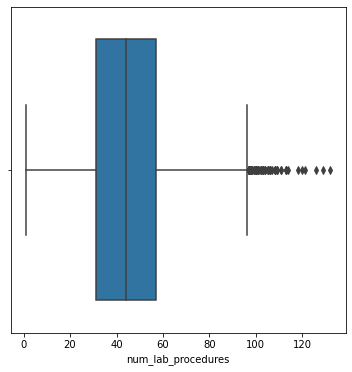

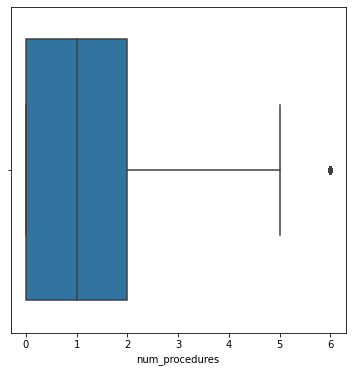

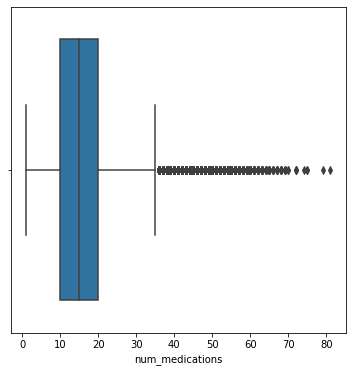

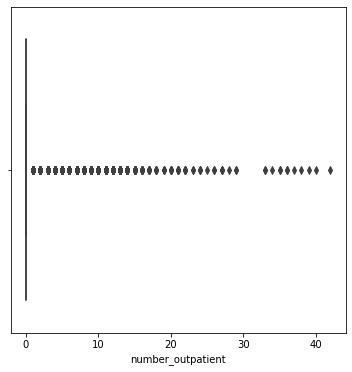

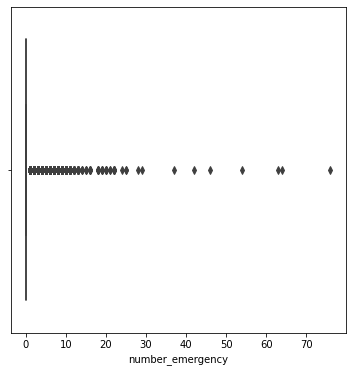

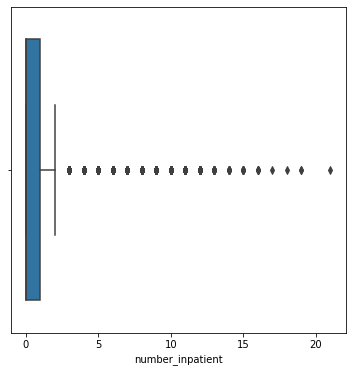

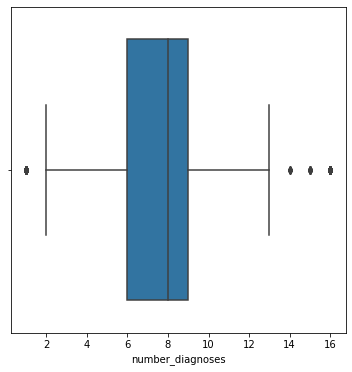

In [101]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()    

In [102]:
for i in num_data.columns:
    print(i)
    print(num_data[i].unique())
    print(num_data[i].nunique())

time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
14
num_lab_procedures
[ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  28  48  10   2  65  67
  40  54  58  57  43  32  83  34  39  69  38  72  22  96  46  78  56  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102   7  89  91  92   4 101  99 100 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
118
num_procedures
[0 5 1 6 2 3 4]
7
num_medications
[ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 25  4 32
  6 26 24 33  5 27 39  3 30 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 53 48 57 59 56 60 63 58 70 67 64 69 65 68 66 81 79
 75 72 74]
75
number_outpatient
[ 0  2  1  5  7  9  3  8  4 12 11  6 20 15 10 13 14 16 21 35 17 29 36 18
 19 27 22 24 42 39 34 26 33 25 23 28 37 38 40]
39
number_eme

In [103]:
num_data = df.select_dtypes(include=np.number)
num_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,1,41,0,1,0,0,0,1,0
1,3,59,0,18,0,0,0,9,1
2,2,11,5,13,2,0,1,6,0
3,2,44,1,16,0,0,0,7,0
4,1,51,0,8,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...
99318,3,51,0,16,0,0,0,9,1
99319,5,33,3,18,0,0,1,9,0
99320,1,53,0,9,1,0,0,13,0
99321,10,45,2,21,0,0,1,9,0


In [104]:
df.shape

(99323, 45)

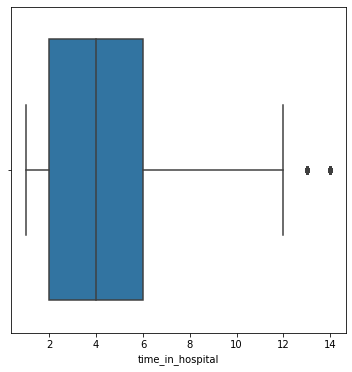

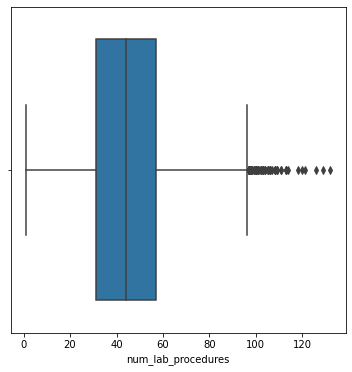

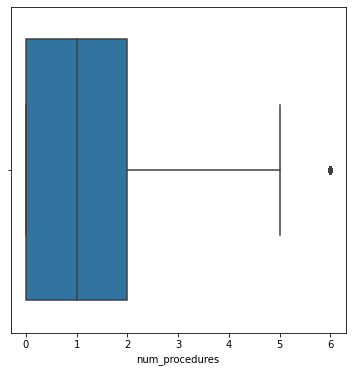

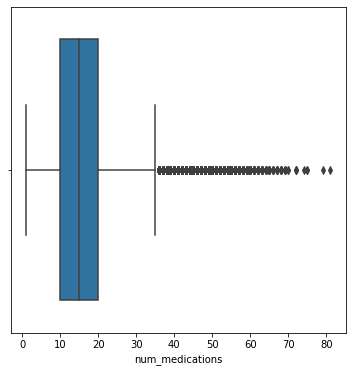

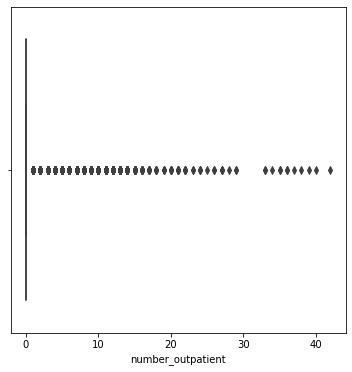

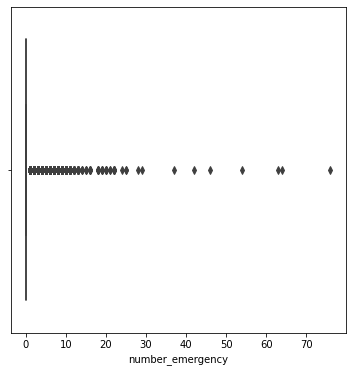

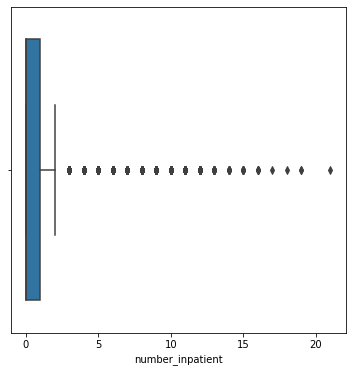

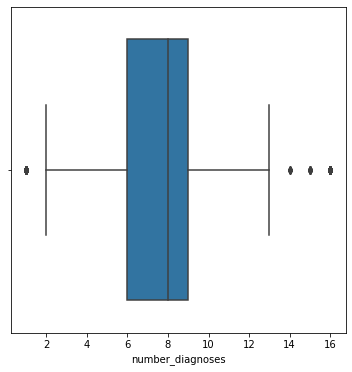

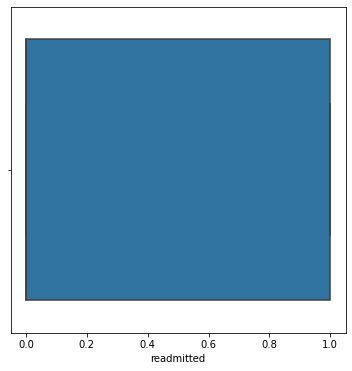

In [105]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show() 

# Encoding 

In [106]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [107]:
replacedict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

In [108]:
df['age'] = df['age'].apply(lambda x : replacedict[x])
print(df['age'])

0         5
1        15
2        25
3        35
4        45
         ..
99318    75
99319    85
99320    75
99321    85
99322    75
Name: age, Length: 99323, dtype: int64


In [109]:
df.max_glu_serum.replace({'>200':200 , '>300':300 , 'Norm':100 , 'None' : 0} , inplace = True)

In [110]:
df.A1Cresult.replace({'>7':7 , '>8':8 , 'Norm':5 , 'None':0} , inplace = True)

### Creating New Features and Dropping Redundant Ones

#### 1. Preceding year visits:
‘number_outpatient’, ‘number_emergency’, ‘number_inpatient’ were combined together by adding them up to get total visits of the patient in the previous year and then dropping the combining features.


In [111]:
# There are 3 types of visits to a hospital. 1) Inpatient 2) Outpatient 3) Emergency.
# Combining them into a single column
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [112]:
df.drop(['number_outpatient' , 'number_emergency','number_inpatient',] , 1 , inplace = True)

In [113]:
df.change.replace({'No':0,'Ch':1} , inplace = True)

In [114]:
df['change'].unique()

array([0, 1], dtype=int64)

In [115]:
df.diabetesMed.replace({'Yes':1 , 'No':0} , inplace = True)


In [116]:
df.diabetesMed.unique()

array([0, 1], dtype=int64)

In [117]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diagnosis1,Diagnosis2,Diagnosis3,total_visits
0,Caucasian,Female,5,Not Available,Not Available,Referral,1,41,0,1,...,No,No,No,0,0,0,Diabetes,Others,Others,0
1,Caucasian,Female,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,No,No,No,1,1,1,Neoplasms,Diabetes,Neoplasms,0
2,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,No,No,No,0,1,0,Others,Diabetes,Others,3
3,Caucasian,Male,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,No,No,No,1,1,0,Neoplasms,Diabetes,Circulatory,0
4,Caucasian,Male,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,No,No,No,1,1,0,Neoplasms,Neoplasms,Diabetes,0


In [118]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3', 'total_visits'],
      dtype='object')

In [119]:
# We can drop examide, citoglipton and metformin-rosiglitazone as it is not prescribed to any patient.
df.drop(['examide', 'citoglipton'], axis = 1, inplace = True)

In [120]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone','metformin-rosiglitazone']

In [121]:
# The medicines can be encoded as below 
for i in meds:
    df[i] = df[i].replace({'No' : -2,
                           'Down' : -1,
                           'Steady' : 0,
                           'Up' : 1})

In [122]:
for i in meds:
    df[i] = df[i].astype('int64')

In [123]:
df = df.reset_index(drop = True)

**. Number of diabetic medicine**

In [124]:
df['number_diab_meds'] = np.nan
for i in range(len(df)):
    n = 0
    for j in meds:
        if df.loc[i, j] != -2:
            n += 1
    df.loc[i, 'number_diab_meds'] = n
df.number_diab_meds=df.number_diab_meds.astype('int64')
df['number_diab_meds'].value_counts()

1    46017
0    22620
2    21592
3     7707
4     1324
5       58
6        5
Name: number_diab_meds, dtype: int64

####  Insulin_treatment

In [125]:
for i in range(len(df)):
    if df.loc[i, 'insulin'] != -2 and df.loc[i, 'number_diab_meds'] == 1:
        df.loc[i, 'insulin_treatment'] = 'insulin_only'
    elif df.loc[i, 'insulin'] != -2 and df.loc[i, 'number_diab_meds'] > 1:
        df.loc[i, 'insulin_treatment'] = 'insulin_combo'
    elif df.loc[i, 'insulin'] == -2 and df.loc[i, 'number_diab_meds'] == 0:
        df.loc[i, 'insulin_treatment'] = 'no_med'
    else:
        df.loc[i, 'insulin_treatment'] = 'other_meds'
df['insulin_treatment'].value_counts()

insulin_only     29856
other_meds       23749
insulin_combo    23098
no_med           22620
Name: insulin_treatment, dtype: int64

In [126]:
# number_diab_meds was inly created to make the column insulin treatment, Hence we drop it
#df=df.drop('number_diab_meds',1)
df.reset_index(drop = True, inplace = True)

In [127]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin-pioglitazone,change,diabetesMed,readmitted,Diagnosis1,Diagnosis2,Diagnosis3,total_visits,number_diab_meds,insulin_treatment
0,Caucasian,Female,5,Not Available,Not Available,Referral,1,41,0,1,...,-2,0,0,0,Diabetes,Others,Others,0,0,no_med
1,Caucasian,Female,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,-2,1,1,1,Neoplasms,Diabetes,Neoplasms,0,1,insulin_only
2,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,-2,0,1,0,Others,Diabetes,Others,3,1,other_meds
3,Caucasian,Male,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,-2,1,1,0,Neoplasms,Diabetes,Circulatory,0,1,insulin_only
4,Caucasian,Male,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,-2,1,1,0,Neoplasms,Neoplasms,Diabetes,0,2,insulin_combo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99318,AfricanAmerican,Male,75,Emergency,Transferred to another medical facility,Emergency,3,51,0,16,...,-2,1,1,1,Diabetes,Others,Circulatory,0,2,insulin_combo
99319,AfricanAmerican,Female,85,Emergency,Transferred to another medical facility,Transferred from another health care facility,5,33,3,18,...,-2,0,1,0,Digestive,Neoplasms,Digestive,1,1,insulin_only
99320,Caucasian,Male,75,Emergency,Discharged to home,Emergency,1,53,0,9,...,-2,1,1,0,Neoplasms,Genitourinary,Others,1,2,insulin_combo
99321,Caucasian,Female,85,Emergency,Transferred to another medical facility,Emergency,10,45,2,21,...,-2,1,1,0,Injury,Others,Injury,1,3,insulin_combo


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99323 entries, 0 to 99322
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99323 non-null  object
 1   gender                    99323 non-null  object
 2   age                       99323 non-null  int64 
 3   admission_type_id         99323 non-null  object
 4   discharge_disposition_id  99323 non-null  object
 5   admission_source_id       99323 non-null  object
 6   time_in_hospital          99323 non-null  int64 
 7   num_lab_procedures        99323 non-null  int64 
 8   num_procedures            99323 non-null  int64 
 9   num_medications           99323 non-null  int64 
 10  number_diagnoses          99323 non-null  int64 
 11  max_glu_serum             99323 non-null  int64 
 12  A1Cresult                 99323 non-null  int64 
 13  metformin                 99323 non-null  int64 
 14  repaglinide           

In [129]:
df[['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
            'Diagnosis1', 'Diagnosis2', 'Diagnosis3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 
            'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
            'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
            'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone', 
            'change', 'diabetesMed', 'insulin_treatment','readmitted']] = df[['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
            'Diagnosis1', 'Diagnosis2', 'Diagnosis3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 
            'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
            'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
            'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone', 
            'change', 'diabetesMed', 'insulin_treatment','readmitted']].astype('object')


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99323 entries, 0 to 99322
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99323 non-null  object
 1   gender                    99323 non-null  object
 2   age                       99323 non-null  int64 
 3   admission_type_id         99323 non-null  object
 4   discharge_disposition_id  99323 non-null  object
 5   admission_source_id       99323 non-null  object
 6   time_in_hospital          99323 non-null  int64 
 7   num_lab_procedures        99323 non-null  int64 
 8   num_procedures            99323 non-null  int64 
 9   num_medications           99323 non-null  int64 
 10  number_diagnoses          99323 non-null  int64 
 11  max_glu_serum             99323 non-null  object
 12  A1Cresult                 99323 non-null  object
 13  metformin                 99323 non-null  object
 14  repaglinide           

In [131]:
num_data = df.select_dtypes(include=np.number)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99323 entries, 0 to 99322
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 99323 non-null  int64
 1   time_in_hospital    99323 non-null  int64
 2   num_lab_procedures  99323 non-null  int64
 3   num_procedures      99323 non-null  int64
 4   num_medications     99323 non-null  int64
 5   number_diagnoses    99323 non-null  int64
 6   total_visits        99323 non-null  int64
 7   number_diab_meds    99323 non-null  int64
dtypes: int64(8)
memory usage: 6.1 MB


In [132]:
num_data.skew()

age                  -0.624415
time_in_hospital      1.141767
num_lab_procedures   -0.241512
num_procedures        1.322202
num_medications       1.335326
number_diagnoses     -0.861656
total_visits          5.348898
number_diab_meds      0.673840
dtype: float64

age
-0.6244150840915105
AxesSubplot(0.125,0.125;0.775x0.755)


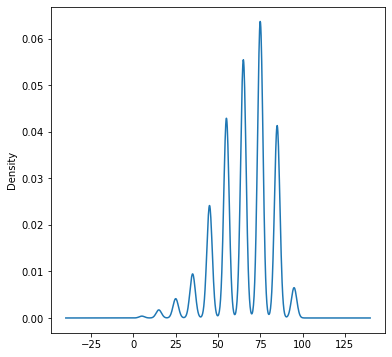

None
time_in_hospital
1.1417666760713834
AxesSubplot(0.125,0.125;0.775x0.755)


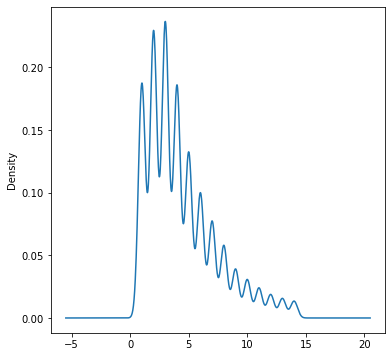

None
num_lab_procedures
-0.24151243716256685
AxesSubplot(0.125,0.125;0.775x0.755)


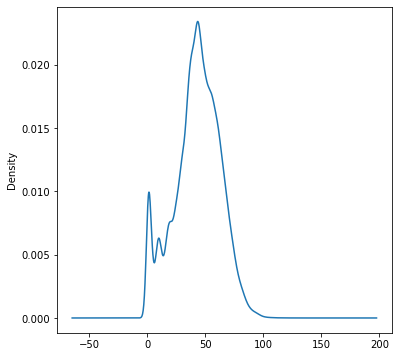

None
num_procedures
1.3222019462630383
AxesSubplot(0.125,0.125;0.775x0.755)


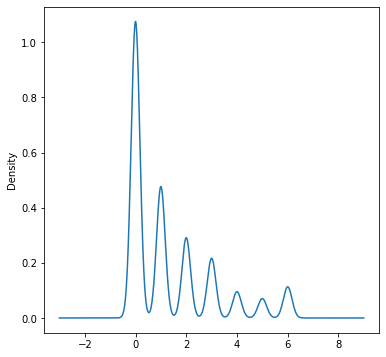

None
num_medications
1.335326471105111
AxesSubplot(0.125,0.125;0.775x0.755)


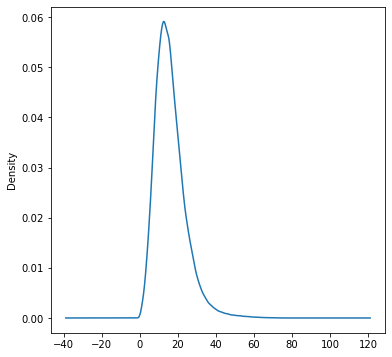

None
number_diagnoses
-0.8616564709708646
AxesSubplot(0.125,0.125;0.775x0.755)


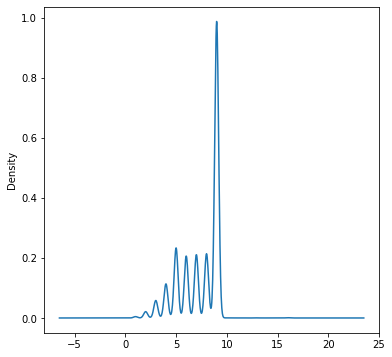

None
total_visits
5.348898117605827
AxesSubplot(0.125,0.125;0.775x0.755)


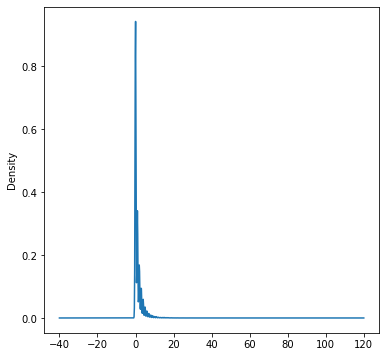

None
number_diab_meds
0.6738400796273811
AxesSubplot(0.125,0.125;0.775x0.755)


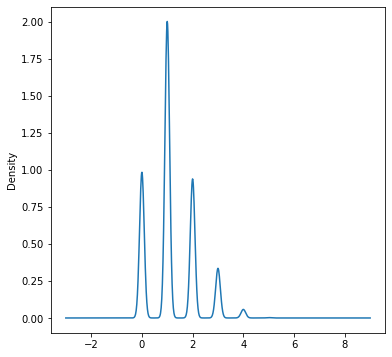

None


In [133]:
for i in num_data.columns:
    print(num_data[i].name)
    print(num_data[i].skew())
    print(num_data[i].plot(kind='kde'))
    print(plt.show())

In [134]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
num_data_pt = pt.fit_transform(num_data)
num_data_pt=pd.DataFrame(num_data_pt,columns=num_data.columns)
num_data_pt.skew()

age                  -0.119073
time_in_hospital      0.012971
num_lab_procedures   -0.229790
num_procedures        0.209672
num_medications       0.019554
number_diagnoses     -0.151325
total_visits          0.418474
number_diab_meds     -0.027221
dtype: float64

In [135]:
cat_data =df.select_dtypes(exclude=np.number)
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99323 entries, 0 to 99322
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99323 non-null  object
 1   gender                    99323 non-null  object
 2   admission_type_id         99323 non-null  object
 3   discharge_disposition_id  99323 non-null  object
 4   admission_source_id       99323 non-null  object
 5   max_glu_serum             99323 non-null  object
 6   A1Cresult                 99323 non-null  object
 7   metformin                 99323 non-null  object
 8   repaglinide               99323 non-null  object
 9   nateglinide               99323 non-null  object
 10  chlorpropamide            99323 non-null  object
 11  glimepiride               99323 non-null  object
 12  acetohexamide             99323 non-null  object
 13  glipizide                 99323 non-null  object
 14  glyburide             

In [136]:
df.shape

(99323, 43)

In [137]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3', 'total_visits',
       'number_diab_meds', 'insulin_treatment'],
      dtype='object')

#### Chi Square for categorical v/s categorical and one way anova for categorical v/s numerical

To see if the features are significant w.r.t to the target variable (readmitted)

In [138]:
#Statistical Tests (Chi Square and Anova)
from scipy import stats
p_val = []
sig = []
for i in df.columns:
    if i in num_data.columns:
        stat, p = stats.f_oneway(df[df['readmitted'] == 0][i], df[df['readmitted'] == 1][i])
    else:
        ct = pd.crosstab(df[i], df['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

,columns,p_value,significance
40,total_visits,0.000000e+00,Significant
36,readmitted,0.000000e+00,Significant
10,number_diagnoses,0.000000e+00,Significant
5,admission_source_id,1.583463e-228,Significant
28,insulin,1.612323e-110,Significant
4,discharge_disposition_id,4.613055e-105,Significant
42,insulin_treatment,3.220842e-92,Significant
35,diabetesMed,7.155342e-75,Significant
3,admission_type_id,8.339376e-75,Significant
6,time_in_hospital,2.374671e-74,Significant


In [139]:
sig_cols = stats_df[stats_df['significance'] == 'Significant']['columns'].reset_index(drop = True)
insig_cols = stats_df[stats_df['significance'] == 'Insignificant']['columns'].reset_index(drop = True)
print('Statiscally significant features are :','\n')
print(sig_cols)

Statiscally significant features are : 

0                         race
1                       gender
2                          age
3            admission_type_id
4     discharge_disposition_id
5          admission_source_id
6             time_in_hospital
7           num_lab_procedures
8               num_procedures
9              num_medications
10            number_diagnoses
11               max_glu_serum
12                   A1Cresult
13                   metformin
14                 repaglinide
15                   glipizide
16                   glyburide
17                pioglitazone
18               rosiglitazone
19                    acarbose
20                     insulin
21                      change
22                 diabetesMed
23                  readmitted
24                  Diagnosis1
25                  Diagnosis2
26                  Diagnosis3
27                total_visits
28            number_diab_meds
29           insulin_treatment
Name: columns, dtype: object


In [140]:
print(insig_cols)

0                  nateglinide
1               chlorpropamide
2                  glimepiride
3                acetohexamide
4                  tolbutamide
5                     miglitol
6                 troglitazone
7                   tolazamide
8          glyburide-metformin
9          glipizide-metformin
10    glimepiride-pioglitazone
11     metformin-rosiglitazone
12      metformin-pioglitazone
Name: columns, dtype: object


In [141]:
#statistically insignificant meds

insignificant_meds = ['glimepiride','nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol',
                      'troglitazone','tolazamide','glyburide-metformin','glipizide-metformin',
                      'glimepiride-pioglitazone','metformin-pioglitazone','glyburide','rosiglitazone','metformin-rosiglitazone']

In [142]:
df.drop(['glimepiride','nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol',
                      'troglitazone','tolazamide','glyburide-metformin','glipizide-metformin',
                      'glimepiride-pioglitazone','metformin-pioglitazone','glyburide','rosiglitazone','metformin-rosiglitazone'],1,inplace=True)

In [143]:
#looking at meds seperately

meds = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone','metformin-rosiglitazone']

len(meds)

21

In [144]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,change,diabetesMed,readmitted,Diagnosis1,Diagnosis2,Diagnosis3,total_visits,number_diab_meds,insulin_treatment
0,Caucasian,Female,5,Not Available,Not Available,Referral,1,41,0,1,...,-2,0,0,0,Diabetes,Others,Others,0,0,no_med
1,Caucasian,Female,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,1,1,1,1,Neoplasms,Diabetes,Neoplasms,0,1,insulin_only
2,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,-2,0,1,0,Others,Diabetes,Others,3,1,other_meds
3,Caucasian,Male,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,1,1,1,0,Neoplasms,Diabetes,Circulatory,0,1,insulin_only
4,Caucasian,Male,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,0,1,1,0,Neoplasms,Neoplasms,Diabetes,0,2,insulin_combo


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99323 entries, 0 to 99322
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99323 non-null  object
 1   gender                    99323 non-null  object
 2   age                       99323 non-null  int64 
 3   admission_type_id         99323 non-null  object
 4   discharge_disposition_id  99323 non-null  object
 5   admission_source_id       99323 non-null  object
 6   time_in_hospital          99323 non-null  int64 
 7   num_lab_procedures        99323 non-null  int64 
 8   num_procedures            99323 non-null  int64 
 9   num_medications           99323 non-null  int64 
 10  number_diagnoses          99323 non-null  int64 
 11  max_glu_serum             99323 non-null  object
 12  A1Cresult                 99323 non-null  object
 13  metformin                 99323 non-null  object
 14  repaglinide           

In [146]:
df.shape

(99323, 27)

In [147]:
# to find the percentage of missing outliers:
col = num_data.columns  # in percentage
for i in col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    ub= q3+1.5*iqr
    lb= q1-1.5*iqr


    out_num_data=df[(df[i]>ub)|(df[i]<lb)]
    print('The number of outliers in the',i,'colunm is',len(out_num_data)/len(df)*100)


The number of outliers in the age colunm is 0.8547869073628465
The number of outliers in the time_in_hospital colunm is 2.161634263967057
The number of outliers in the num_lab_procedures colunm is 0.12081793743644474
The number of outliers in the num_procedures colunm is 4.831710681312486
The number of outliers in the num_medications colunm is 2.4717336367205984
The number of outliers in the number_diagnoses colunm is 0.2788880722491266
The number of outliers in the total_visits colunm is 4.353473012293225
The number of outliers in the number_diab_meds colunm is 1.3964539935362403


In [148]:
def cap(s):
    q1= df[s].quantile(0.25)
    q3= df[s].quantile(0.75)
    iqr= q3 -q1
    ub= q3 + 1.5 * iqr 
    lb= q1 - 1.5 * iqr
    uc = df[s].quantile(0.90)
    lc = df[s].quantile(0.10)
    ind1=df[df[s] > ub].index
    ind2=df[df[s] < lb].index
    df.loc[ind1,s]=uc
    df.loc[ind2,s]=lc

In [149]:
cap('num_procedures')
cap('time_in_hospital')
cap('num_medications')
cap('total_visits')

In [150]:
col = num_data.columns  # in percentage
for i in col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    ub= q3+1.5*iqr
    lb= q1-1.5*iqr


    out_num_data=df[(df[i]>ub)|(df[i]<lb)]
    print('The number of outliers in the',i,'colunm is',len(out_num_data)/len(df)*100)


The number of outliers in the age colunm is 0.8547869073628465
The number of outliers in the time_in_hospital colunm is 0.0
The number of outliers in the num_lab_procedures colunm is 0.12081793743644474
The number of outliers in the num_procedures colunm is 0.0
The number of outliers in the num_medications colunm is 0.0
The number of outliers in the number_diagnoses colunm is 0.2788880722491266
The number of outliers in the total_visits colunm is 0.0
The number of outliers in the number_diab_meds colunm is 1.3964539935362403


In [151]:
df['admission_type_id'].value_counts()

Emergency        70518
Elective         18667
Not Available    10138
Name: admission_type_id, dtype: int64

In [152]:
df['admission_source_id'].value_counts()

Emergency                                        56923
Referral                                         30488
Transferred from another health care facility     6180
Not Available                                     5732
Name: admission_source_id, dtype: int64

admission sorce id and admission type id are similar as admission type id's details are present in admission source id so we can drop admission type id and just keep admission source id

In [153]:
df = df.drop(['admission_type_id'],axis=1)

In [154]:
df.shape

(99323, 26)

In [155]:
df = pd.get_dummies(df,columns=['race', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum','A1Cresult','Diagnosis2','Diagnosis1','Diagnosis3','insulin_treatment' ],drop_first=True) 
       

In [156]:
df['gender']=df['gender'].replace({'Male':0,'Female':1})

In [157]:
df.columns

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses', 'metformin',
       'repaglinide', 'glipizide', 'pioglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'total_visits', 'number_diab_meds',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'discharge_disposition_id_Discharged to home with home health service',
       'discharge_disposition_id_Left AMA',
       'discharge_disposition_id_Not Available',
       'discharge_disposition_id_Still patient/referred to this institution',
       'discharge_disposition_id_Transferred to another medical facility',
       'admission_source_id_Not Available', 'admission_source_id_Referral',
       'admission_source_id_Transferred from another health care facility',
       'max_glu_serum_100', 'max_glu_serum_200', 'max_glu_serum_300',
       'A1Cresult_5', 'A1Cresult_7', 'A1Cresult_8', 'Diagnosis2_Diabetes',
       'Diagnosis2_Di

In [158]:
df.readmitted.unique()

array([0, 1], dtype=object)

In [159]:
df.shape

(99323, 62)

In [160]:
df

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,repaglinide,glipizide,...,Diagnosis3_Digestive,Diagnosis3_Genitourinary,Diagnosis3_Injury,Diagnosis3_Musculoskeletal,Diagnosis3_Neoplasms,Diagnosis3_Others,Diagnosis3_Respiratory,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
0,1,5,1.0,41,0.0,1.0,1,-2,-2,-2,...,0,0,0,0,0,1,0,0,1,0
1,1,15,3.0,59,0.0,18.0,9,-2,-2,-2,...,0,0,0,0,1,0,0,1,0,0
2,1,25,2.0,11,5.0,13.0,6,-2,-2,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35,2.0,44,1.0,16.0,7,-2,-2,-2,...,0,0,0,0,0,0,0,1,0,0
4,0,45,1.0,51,0.0,8.0,5,-2,-2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99318,0,75,3.0,51,0.0,16.0,9,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0
99319,1,85,5.0,33,3.0,18.0,9,-2,-2,-2,...,1,0,0,0,0,0,0,1,0,0
99320,0,75,1.0,53,0.0,9.0,13,0,-2,-2,...,0,0,0,0,0,1,0,0,0,0
99321,1,85,10.0,45,2.0,21.0,9,-2,-2,0,...,0,0,1,0,0,0,0,0,0,0


In [161]:
df.readmitted.unique()

array([0, 1], dtype=object)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99323 entries, 0 to 99322
Data columns (total 62 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   gender                                                                99323 non-null  int64  
 1   age                                                                   99323 non-null  int64  
 2   time_in_hospital                                                      99323 non-null  float64
 3   num_lab_procedures                                                    99323 non-null  int64  
 4   num_procedures                                                        99323 non-null  float64
 5   num_medications                                                       99323 non-null  float64
 6   number_diagnoses                                                      99323 non-null  int64  


In [163]:
df[['metformin', 'repaglinide', 'glipizide', 'pioglitazone', 'insulin', 'change', 'diabetesMed']]=df[['metformin', 'repaglinide', 'glipizide', 'pioglitazone', 'insulin', 'change', 'diabetesMed']].astype('int')

In [164]:
df['readmitted'] = df['readmitted'].astype('int')

In [165]:
df['readmitted'] .unique()

array([0, 1])

In [166]:
num_data

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,total_visits,number_diab_meds
0,5,1,41,0,1,1,0,0
1,15,3,59,0,18,9,0,1
2,25,2,11,5,13,6,3,1
3,35,2,44,1,16,7,0,1
4,45,1,51,0,8,5,0,2
...,...,...,...,...,...,...,...,...
99318,75,3,51,0,16,9,0,2
99319,85,5,33,3,18,9,1,1
99320,75,1,53,0,9,13,1,2
99321,85,10,45,2,21,9,1,3


In [167]:
import pandas as pd

In [168]:
df.to_csv('df_cleanedfinal.csv', index = False)